# Gradient Descent Implementation

In this Python notebook we will go through an example of implementing **Gradient Descent** in simple and multiple linear regression, for this we will be using housing dataset.

In [47]:
# Importing necessary libraries
import pandas as pd

In [48]:
# importing the dataset
housing = pd.read_csv("housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [49]:
# Converting yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes' : 1, 'no' : 0})
housing['guestroom'] = housing['guestroom'].map({'yes' : 1, 'no' : 0})
housing['basement'] = housing['basement'].map({'yes' : 1, 'no' : 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes' : 1, 'no' : 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes' : 1, 'no' : 0})
housing['prefarea'] = housing['prefarea'].map({'yes' : 1, 'no' : 0})

In [50]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [51]:
# Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True, dtype=int)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [52]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [53]:
# Normalizing the data
housing = (housing-housing.mean())/housing.std()
housing.head()           

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


# Simple Linear Regression

In [54]:
# Assign Feature Variable to X
X = housing['area']

# Assign Response variable to y
y = housing['price']

In [56]:
# importing seaborn
import seaborn as sns

# To visiualize in the notebook
%matplotlib inline

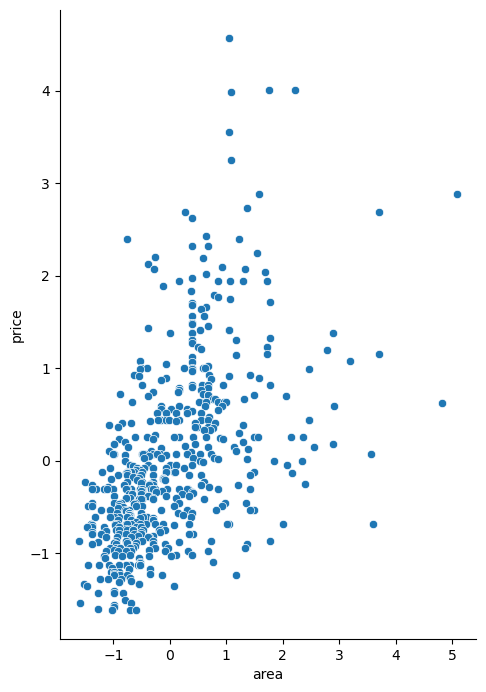

In [58]:
# Visualise the relationship between the features and the response variable using scatterplots
sns.pairplot(housing, x_vars='area', y_vars='price', height=7, aspect=0.7, kind = 'scatter')

**For linear regression we use a cost function known as the mean squared error or MSE.**

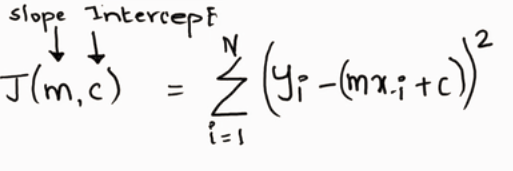

In [60]:
from IPython.display import Image
Image(filename='gd1.png')

Now we will apply partial derivative with respect to **m** and **c** and will equate it to zero to find the least value of m and c for which our cost function get the lowest value as possible.

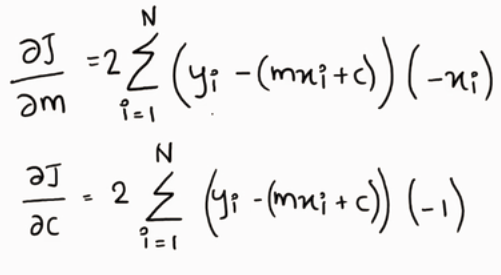

In [61]:
Image(filename='gd2.png')

Now to apply gradient descent from scratch we need our X and y variables as numpy arrays, Let's convert them.

In [63]:
import numpy as np

In [64]:
X = np.array(X)
y = np.array(y)

In [65]:
# Implement gradient descent function
# Takes in X, y, current m and c (both initialised to 0), num of iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters = 1000, learning_rate = 0.01):
    N = float(len(y))
    gd_df = pd.DataFrame(columns = ['m_current', 'c_current', 'cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y-y_current))
        c_gradient = -(2/N) * sum(y-y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current - c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current, c_current, cost]
    return(gd_df)

In [66]:
# print gradients at multiple (m, c) pairs
# notice that gradient decreased gradually towards 0
# we have used 1000 iterations, can use more if needed

gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.010700,0.0,0.998165
1,0.021187,0.0,0.986830
2,0.031464,0.0,0.975943
3,0.041536,0.0,0.965486
4,0.051407,0.0,0.955442
...,...,...,...
995,0.535997,0.0,0.711399
996,0.535997,0.0,0.711399
997,0.535997,0.0,0.711399
998,0.535997,0.0,0.711399


<Axes: xlabel='index'>

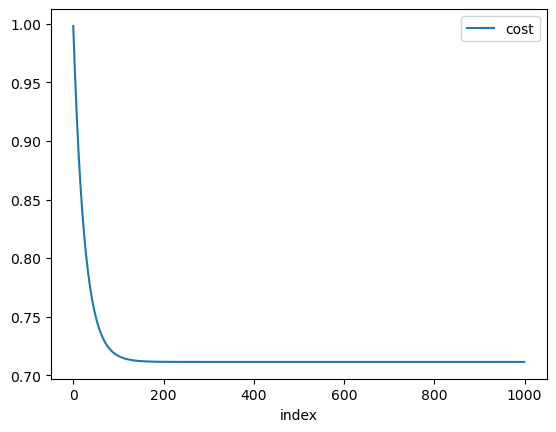

In [67]:
# plotting cost against number of iterations
gradients.reset_index().plot.line(x = 'index', y = ['cost'])

# Multiple Regression: Applying Gradient Descent for multiple(>1) Features

In [68]:
# Assigning feature variables to X
X = housing[['area', 'bedrooms']]

# Assigning response variable to y
y = housing['price']

In [72]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function
X['intercept'] = 1
X = X[['intercept', 'area', 'bedrooms']]
X.head()

C:\Users\bindroo\AppData\Local\Temp\ipykernel_23272\3461344223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131


In [73]:
# Converting X and y to numpy arrays
X = np.array(X)
y = np.array(y)

In [74]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0,0,0]))
alpha = 0.01
iterations = 1000

In [75]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

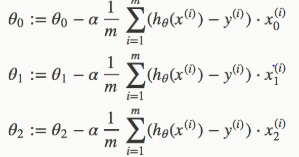

In [76]:
Image(filename='gd.png')

In [77]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)
def gradient_descent_multi(X,y,theta,alpha,iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame(columns = ['Bets', 'cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X,theta)-y)
        theta = theta-alpha * gradient
        cost = compute_cost(X,y,theta)
        gdm_df.loc[i] = [theta, cost]

    return gdm_df

In [78]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[2.3711919278232707e-18, 0.005350138644096793,...",0.494906
1,"[3.617901085750969e-18, 0.010641328951860771, ...",0.490824
2,"[5.785382366854027e-18, 0.015874226967184046, ...",0.486834
3,"[8.075090035989212e-18, 0.021049481374934606, ...",0.482935
4,"[1.0368871918058801e-17, 0.026167733584010238,...",0.479124
...,...,...
995,"[3.3328691488600403e-16, 0.4916558741575689, 0...",0.314176
996,"[3.3359248085608434e-16, 0.49165609672441263, ...",0.314176
997,"[3.337635977993293e-16, 0.4916563172711537, 0....",0.314176
998,"[3.3429324548080186e-16, 0.4916565358164564, 0...",0.314176


<Axes: xlabel='index'>

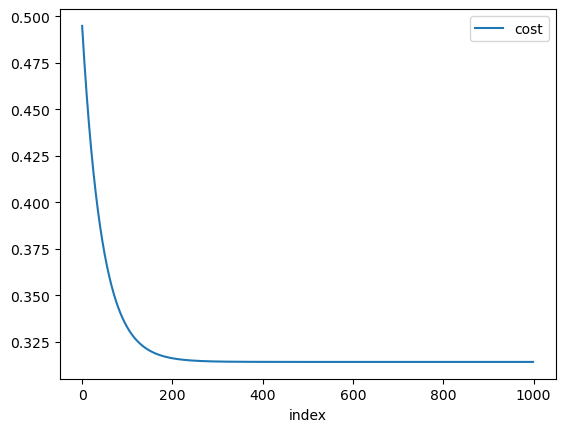

In [80]:
# print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])